<a href="https://colab.research.google.com/github/tsultan732/AI_Projects/blob/main/Machine-Learning/Regression_Project/climate_change_impact_on_agriculture_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
data_path = '/content/drive/MyDrive/Machine Learning/Chapter 1/climate_change_impact_on_agriculture_2024.csv'
df = pd.read_csv(data_path)

In [ ]:
df.shape

(10000, 15)

In [ ]:
df.dtypes

,0
Year,int64
Country,object
Region,object
Crop_Type,object
Average_Temperature_C,float64
Total_Precipitation_mm,float64
CO2_Emissions_MT,float64
Crop_Yield_MT_per_HA,float64
Extreme_Weather_Events,int64
Irrigation_Access_%,float64


In [ ]:
df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Total_Precipitation_mm       10000 non-null  float64
 6   CO2_Emissions_MT             10000 non-null  float64
 7   Crop_Yield_MT_per_HA         10000 non-null  float64
 8   Extreme_Weather_Events       10000 non-null  int64  
 9   Irrigation_Access_%          10000 non-null  float64
 10  Pesticide_Use_KG_per_HA      10000 non-null  float64
 11  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 12  Soil_Health_Index            10000 non-null  float64
 13  Adaptation_Strate

In [ ]:
predictors = [
    'Average_Temperature_C',
    'Total_Precipitation_mm',
    'CO2_Emissions_MT',
    'Irrigation_Access_%',
    'Pesticide_Use_KG_per_HA',
    'Fertilizer_Use_KG_per_HA',
    'Soil_Health_Index',
    'Extreme_Weather_Events'
]

categorical_cols = ['Crop_Type', 'Adaptation_Strategies']

target = 'Crop_Yield_MT_per_HA'

In [ ]:
all_cols = predictors + categorical_cols + [target]

In [ ]:
df_preprocess = df[all_cols].copy()

In [ ]:
df_preprocess.describe()

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Extreme_Weather_Events,Crop_Yield_MT_per_HA
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.241299,1611.663834,15.246608,55.248332,24.955735,49.973708,64.901278,4.980900,2.240017
std,11.466955,805.016815,8.589423,25.988305,14.490962,28.711027,20.195882,3.165808,0.998342
min,-4.990000,200.150000,0.500000,10.010000,0.000000,0.010000,30.000000,0.000000,0.450000
25%,5.430000,925.697500,7.760000,32.677500,12.527500,25.390000,47.235000,2.000000,1.449000
50%,15.175000,1611.160000,15.200000,55.175000,24.930000,49.635000,64.650000,5.000000,2.170000
75%,25.340000,2306.997500,22.820000,77.582500,37.470000,74.825000,82.472500,8.000000,2.930000
max,35.000000,2999.670000,30.000000,99.990000,49.990000,99.990000,100.000000,10.000000,5.000000


Imports

In [ ]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_cols = predictors + [target]
numeric_cols

['Average_Temperature_C',
 'Total_Precipitation_mm',
 'CO2_Emissions_MT',
 'Irrigation_Access_%',
 'Pesticide_Use_KG_per_HA',
 'Fertilizer_Use_KG_per_HA',
 'Soil_Health_Index',
 'Extreme_Weather_Events',
 'Crop_Yield_MT_per_HA']

Check Outlier

In [ ]:
for col in numeric_cols:
  z_scores = np.abs(stats.zscore(df_preprocess[col]))
  outliers = z_scores > 3
  print(f"Outliers in {col}: {outliers.sum()}")
  df_preprocess[col] = np.where(outliers, np.sign(df_preprocess[col]) * 3 * df_preprocess[col].std() + df_preprocess[col].mean(), df_preprocess[col])

Outliers in Average_Temperature_C: 0
Outliers in Total_Precipitation_mm: 0
Outliers in CO2_Emissions_MT: 0
Outliers in Irrigation_Access_%: 0
Outliers in Pesticide_Use_KG_per_HA: 0
Outliers in Fertilizer_Use_KG_per_HA: 0
Outliers in Soil_Health_Index: 0
Outliers in Extreme_Weather_Events: 0
Outliers in Crop_Yield_MT_per_HA: 0


One-Hot Encoding

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_cats = encoder.fit_transform(df_preprocess[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
# Drop original categoricals and concat encoded

df_preprocess = df_preprocess.drop(categorical_cols, axis=1)
df_preprocess = pd.concat([df_preprocess, encoded_df], axis=1)

In [ ]:
df_preprocess

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Extreme_Weather_Events,Crop_Yield_MT_per_HA,Crop_Type_Coffee,...,Crop_Type_Fruits,Crop_Type_Rice,Crop_Type_Soybeans,Crop_Type_Sugarcane,Crop_Type_Vegetables,Crop_Type_Wheat,Adaptation_Strategies_Drought-resistant Crops,Adaptation_Strategies_No Adaptation,Adaptation_Strategies_Organic Farming,Adaptation_Strategies_Water Management
0,1.55,447.06,15.22,14.54,10.08,14.78,83.25,8.0,1.737,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3.23,2913.57,29.82,11.05,33.06,23.25,54.02,8.0,1.737,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21.11,1301.74,25.75,84.42,27.41,65.53,67.78,5.0,1.719,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,27.85,1154.36,13.91,94.06,14.38,87.58,91.39,5.0,3.890,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.19,1627.48,11.81,95.75,44.35,88.08,49.61,9.0,1.080,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,30.48,685.93,17.64,27.56,41.96,10.95,43.41,9.0,3.033,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,9.53,2560.38,10.68,77.02,5.45,82.32,59.39,4.0,2.560,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,31.92,357.76,26.01,78.53,11.94,26.00,41.46,10.0,1.161,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,13.95,1549.52,17.31,42.65,44.71,25.07,75.10,2.0,3.348,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Update predictors to include new encoded columns

predictors = [col for col in df_preprocess.columns if col != target]

print("Updated Predictors After Encoding:", predictors)

Updated Predictors After Encoding: ['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Irrigation_Access_%', 'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Soil_Health_Index', 'Extreme_Weather_Events', 'Crop_Type_Coffee', 'Crop_Type_Corn', 'Crop_Type_Cotton', 'Crop_Type_Fruits', 'Crop_Type_Rice', 'Crop_Type_Soybeans', 'Crop_Type_Sugarcane', 'Crop_Type_Vegetables', 'Crop_Type_Wheat', 'Adaptation_Strategies_Drought-resistant Crops', 'Adaptation_Strategies_No Adaptation', 'Adaptation_Strategies_Organic Farming', 'Adaptation_Strategies_Water Management']


Handle Skewed Data

In [ ]:
for col in numeric_cols:
  skew = df_preprocess[col].skew()
  print(f"Skewness of {col}: {skew}")

  if abs(skew) > 1:
    df_preprocess[col] = np.log1p(df_preprocess[col].clip(lower=0))
    print(f"Applied log transform to {col}")

Skewness of Average_Temperature_C: -0.011513117666641674
Skewness of Total_Precipitation_mm: -0.0060138760287568056
Skewness of CO2_Emissions_MT: 0.009934544879731678
Skewness of Irrigation_Access_%: -0.008659392911596892
Skewness of Pesticide_Use_KG_per_HA: -0.0015238019883480173
Skewness of Fertilizer_Use_KG_per_HA: 0.013391104585745663
Skewness of Soil_Health_Index: 0.011195630332861637
Skewness of Extreme_Weather_Events: 0.011542807713762846
Skewness of Crop_Yield_MT_per_HA: 0.35731072549532994


Scaling/Standardization

In [ ]:
scaler = StandardScaler()

df_preprocess[predictors] = scaler.fit_transform(df_preprocess[predictors])

In [ ]:
df_preprocess

,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Extreme_Weather_Events,Crop_Yield_MT_per_HA,Crop_Type_Coffee,...,Crop_Type_Fruits,Crop_Type_Rice,Crop_Type_Soybeans,Crop_Type_Sugarcane,Crop_Type_Vegetables,Crop_Type_Wheat,Adaptation_Strategies_Drought-resistant Crops,Adaptation_Strategies_No Adaptation,Adaptation_Strategies_Organic Farming,Adaptation_Strategies_Water Management
0,-1.194038,-1.446755,-0.003098,-1.566488,-1.026604,-1.225852,0.908583,0.953706,1.737,-0.323051,...,-0.329431,-0.337393,-0.3255,-0.332407,-0.339961,-0.341971,-0.499219,-0.503747,-0.496091,1.969881
1,-1.047523,1.617322,1.696752,-1.700786,0.559291,-0.930829,-0.538814,0.953706,1.737,-0.323051,...,-0.329431,-0.337393,-0.3255,-0.332407,-0.339961,-0.341971,-0.499219,-0.503747,-0.496091,-0.507645
2,0.511818,-0.385010,1.222890,1.122548,0.169374,0.541850,0.142547,0.006034,1.719,-0.323051,...,-0.329431,-0.337393,-0.3255,-0.332407,-0.339961,2.924226,-0.499219,-0.503747,-0.496091,1.969881
3,1.099623,-0.568096,-0.155619,1.493503,-0.729852,1.309886,1.311656,0.006034,3.890,3.095482,...,-0.329431,-0.337393,-0.3255,-0.332407,-0.339961,-0.341971,-0.499219,1.985123,-0.496091,-0.507645
4,-1.138223,0.019648,-0.400118,1.558535,1.338437,1.327302,-0.757186,1.269597,1.080,-0.323051,...,-0.329431,-0.337393,-0.3255,3.008364,-0.339961,-0.341971,-0.499219,-0.503747,-0.496091,-0.507645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.328990,-1.150013,0.278658,-1.065468,1.173498,-1.359257,-1.064195,1.269597,3.033,-0.323051,...,-0.329431,-0.337393,-0.3255,-0.332407,-0.339961,-0.341971,-0.499219,1.985123,-0.496091,-0.507645
9996,-0.498091,1.178564,-0.531681,0.837791,-1.346129,1.126672,-0.272905,-0.309857,2.560,-0.323051,...,-0.329431,-0.337393,3.0722,-0.332407,-0.339961,-0.341971,-0.499219,1.985123,-0.496091,-0.507645
9997,1.454574,-1.557690,1.253161,0.895897,-0.898242,-0.835042,-1.160754,1.585488,1.161,3.095482,...,-0.329431,-0.337393,-0.3255,-0.332407,-0.339961,-0.341971,-0.499219,-0.503747,-0.496091,1.969881
9998,-0.112616,-0.077200,0.240237,-0.484794,1.363281,-0.867435,0.505015,-0.941639,3.348,-0.323051,...,-0.329431,-0.337393,3.0722,-0.332407,-0.339961,-0.341971,-0.499219,-0.503747,-0.496091,-0.507645


Correlation Matrix & Heatmap

Correlations with Target: Crop_Yield_MT_per_HA                             1.000000
Average_Temperature_C                            0.263781
Total_Precipitation_mm                           0.029728
Crop_Type_Fruits                                 0.017603
Crop_Type_Wheat                                  0.009117
Crop_Type_Sugarcane                              0.007916
Fertilizer_Use_KG_per_HA                         0.006423
Crop_Type_Rice                                   0.003080
Adaptation_Strategies_Drought-resistant Crops    0.002204
Irrigation_Access_%                             -0.000255
Adaptation_Strategies_Organic Farming           -0.000909
Adaptation_Strategies_No Adaptation             -0.001049
Pesticide_Use_KG_per_HA                         -0.004035
Crop_Type_Soybeans                              -0.004348
Extreme_Weather_Events                          -0.005094
Crop_Type_Coffee                                -0.005116
Soil_Health_Index                             

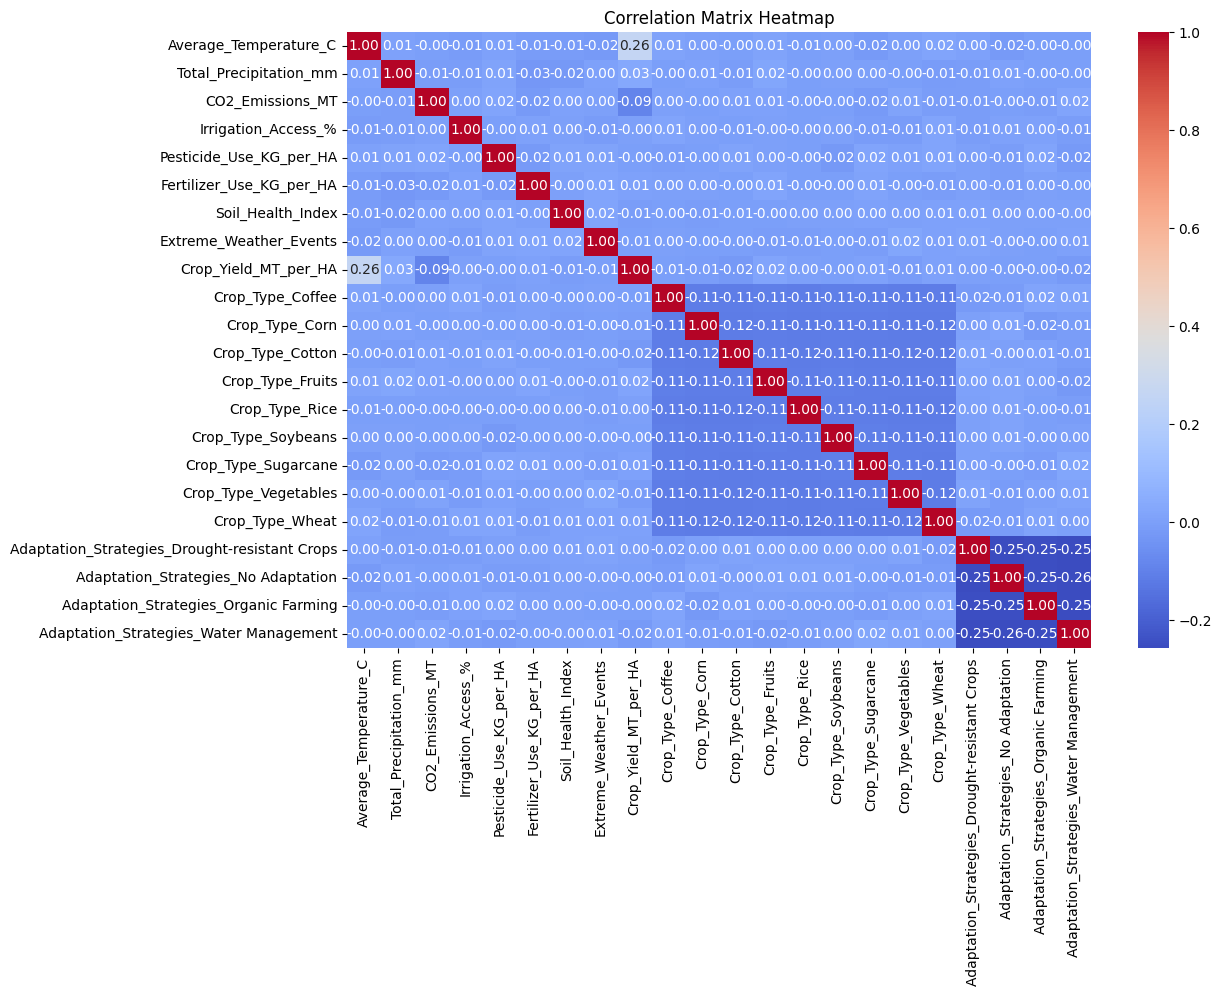

In [ ]:
corr_matrix = df_preprocess.corr()

print("Correlations with Target:", corr_matrix[target].sort_values(ascending=False))

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Additional Preprocessing (e.g., train/test split to avoid leakge)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_preprocess[predictors]
y = df_preprocess[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

Train Shape: (8000, 21) Test Shape: (2000, 21)


# Exploratory Data Analysis and Assumption Checks

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

In [ ]:
def regression_diagnostics(X, y, verbose=True, p_value_threshold=0.05):

  """
  Runs OLS regression diagnostics: summary, p-values, VIF, residuals/fitted plots,
  Q-Q plot, Durbin-Watson, Breusch-Pagan, and key statistics.

  Also identifies insignificant features (p > threshold)

  X: DataFrame of predictors (without constant)
  y: Series/array of response
  verbose: print outputs and show plots if True

  Returns: dict with model object, p_values Series, vif DataFrame, and stats dict
  """

  # Add constant (intercept)
  X_const = sm.add_constant(X)

  # Fit OLS
  model = sm.OLS(y, X_const).fit()

  # p-values
  p_values = model.pvalues

  # VIF
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  # Residuals/fitted
  residuals = model.resid
  fitted = model.fittedvalues

  # Durbin-Watson
  dw_stat = durbin_watson(residuals)

  # Breusch-Pagan
  bp_test = het_breuschpagan(residuals, X_const)
  bp_pvalue = bp_test[1]

  # stats
  stats_dict = {
      "R_squared": model.rsquared,
      "Adjusted_R_squared": model.rsquared_adj,
      "F_statistic": model.fvalue,
      "AIC": model.aic,
      "BIC": model.bic,
      "Durbin_watson": dw_stat,
      "Breusch_pagan_pvalue": bp_pvalue
  }

  # Identify insignificant features
  insignificant_features = p_values[p_values > p_value_threshold].index.tolist()

  if 'const' in insignificant_features:
    insignificant_features.remove('const')

  if verbose:
    print("\nRegression Summary:")
    print(model.summary())
    print("\nP-Values:")
    print(p_values)
    print("\nVIF:")
    print(vif_data)
    print(f"\nDurbin-Watson: {dw_stat: .4f}")
    print(f"Breusch-Pagan p-value: {bp_pvalue: .4f}")
    print(f"\nInsignificant Features (p > {p_value_threshold}):", insignificant_features)

    # Residuals vs Fitted
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=fitted, y=residuals)
    plt.axhline(0, color='red', ls='--')
    plt.title("Residuals vs Fitted")
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.show()

    # Q-Q plot
    sm.qqplot(residuals, line='s')
    plt.title("Q-Q Plot of Residuals")
    plt.show()

  return {
      "model": model,
      "p_values": p_values,
      "vif_data": vif_data,
      "diagnostics_stats": stats_dict,
      "insignificant_features": insignificant_features
  }


Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.083
Model:                              OLS   Adj. R-squared:                  0.080
Method:                   Least Squares   F-statistic:                     34.19
Date:                  Tue, 12 Aug 2025   Prob (F-statistic):          4.05e-132
Time:                          19:10:38   Log-Likelihood:                -10932.
No. Observations:                  8000   AIC:                         2.191e+04
Df Residuals:                      7978   BIC:                         2.206e+04
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

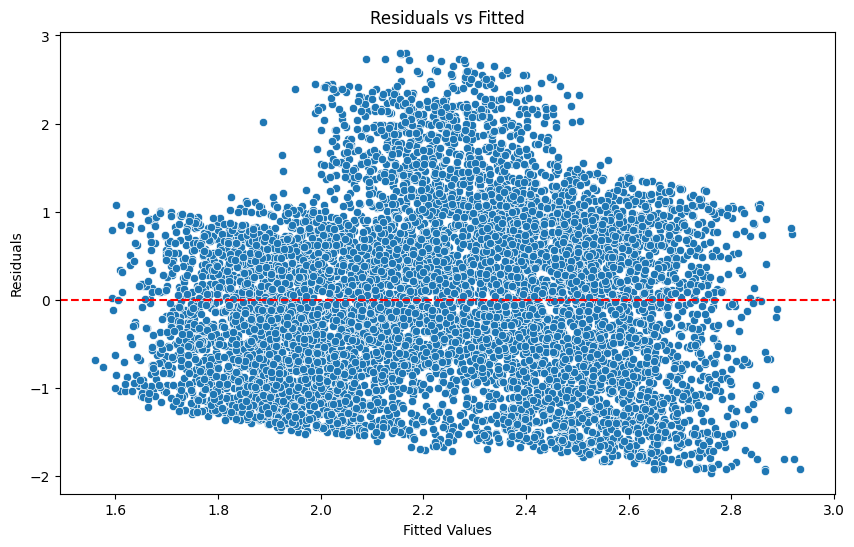

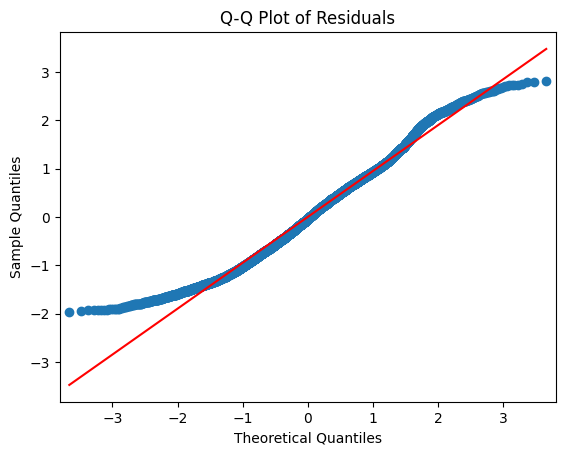

In [ ]:
model_1 = regression_diagnostics(X_train, y_train)

In [ ]:
predictors_2 = [col for col in predictors if col not in model_1["insignificant_features"]]
predictors_2

['Average_Temperature_C',
 'Total_Precipitation_mm',
 'CO2_Emissions_MT',
 'Crop_Type_Cotton']

In [ ]:
X_train2 = X_train[predictors_2].copy()
X_test2 = X_test[predictors_2].copy()

X_train2.shape, X_test2.shape

((8000, 4), (2000, 4))


Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.081
Model:                              OLS   Adj. R-squared:                  0.080
Method:                   Least Squares   F-statistic:                     176.1
Date:                  Tue, 12 Aug 2025   Prob (F-statistic):          8.91e-145
Time:                          19:10:39   Log-Likelihood:                -10939.
No. Observations:                  8000   AIC:                         2.189e+04
Df Residuals:                      7995   BIC:                         2.192e+04
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

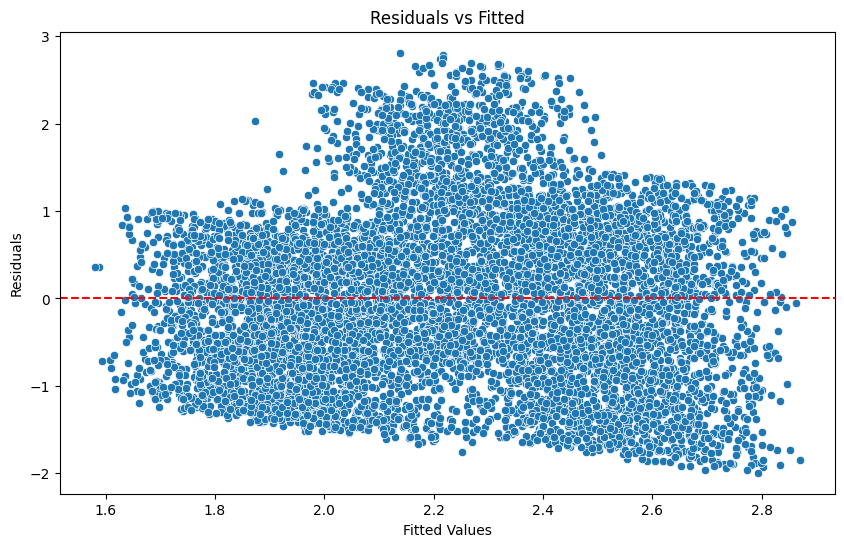

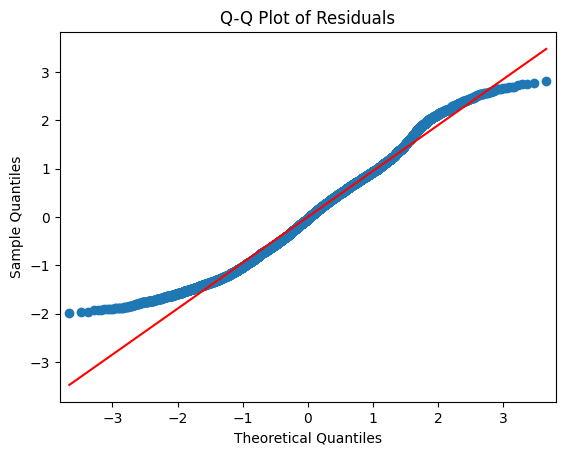

In [ ]:
model_2 = regression_diagnostics(X_train2, y_train)

In [ ]:
predictors_3 = [col for col in predictors_2 if col not in model_2["insignificant_features"]]
predictors_3

['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT']

In [ ]:
X_train3 = X_train2[predictors_3].copy()
X_test3 = X_test2[predictors_3].copy()

X_train3.shape, X_test3.shape

((8000, 3), (2000, 3))


Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.081
Model:                              OLS   Adj. R-squared:                  0.080
Method:                   Least Squares   F-statistic:                     233.6
Date:                  Tue, 12 Aug 2025   Prob (F-statistic):          2.89e-145
Time:                          19:10:39   Log-Likelihood:                -10941.
No. Observations:                  8000   AIC:                         2.189e+04
Df Residuals:                      7996   BIC:                         2.192e+04
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

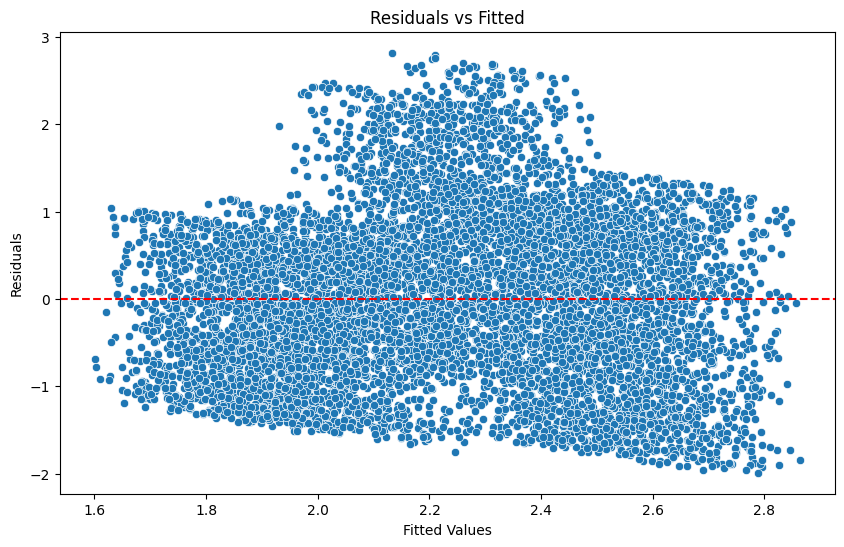

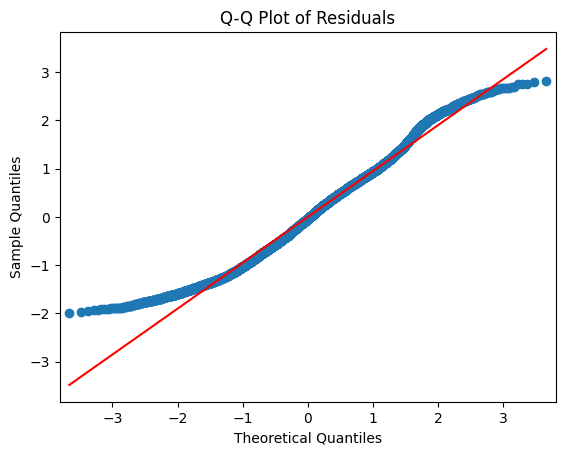

In [ ]:
model_3 = regression_diagnostics(X_train3, y_train)

# Interaction Terms

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

X_train4 = poly.fit_transform(X_train3)
X_test4 = poly.transform(X_test3)

In [ ]:
X_train4, X_test4

(array([[-1.74521487,  0.51361268, -0.2161613 , -0.89636448,  0.37724792,
         -0.11102318],
        [-0.55041768,  1.29758581, -0.78665888, -0.71421418,  0.43299096,
         -1.02075741],
        [ 0.12285489,  0.86415704,  1.34863207,  0.10616592,  0.16568604,
          1.1654299 ],
        ...,
        [-1.38067091, -0.28390123,  0.3170793 ,  0.39197417, -0.43778216,
         -0.0900192 ],
        [ 1.08305321,  1.23374544, -0.9915723 ,  1.33621196, -1.07392556,
         -1.22334781],
        [ 1.00456288,  1.68721206,  0.70944192,  1.69491061,  0.71267902,
          1.19697896]]),
 array([[-1.09897785, -1.36341092,  0.78162733,  1.4983584 , -0.85899112,
         -1.06567923],
        [-0.10999974,  0.40891397, -1.06375771, -0.04498043,  0.11701308,
         -0.43498539],
        [ 1.70225467, -1.69473733, -0.79480885, -2.88487454, -1.35296708,
          1.34699223],
        ...,
        [ 1.27230211,  0.56393712, -1.70294786,  0.71749839, -2.16666415,
         -0.96035551],
  

In [ ]:
predictors_4 = poly.get_feature_names_out(predictors_3)

In [ ]:
predictors_4

array(['Average_Temperature_C', 'Total_Precipitation_mm',
       'CO2_Emissions_MT', 'Average_Temperature_C Total_Precipitation_mm',
       'Average_Temperature_C CO2_Emissions_MT',
       'Total_Precipitation_mm CO2_Emissions_MT'], dtype=object)

In [ ]:
X_train4 = pd.DataFrame(X_train4, columns=predictors_4, index=X_train3.index)
X_test4 = pd.DataFrame(X_test4, columns=predictors_4, index=X_test3.index)

X_train4, X_test4

(      Average_Temperature_C  Total_Precipitation_mm  CO2_Emissions_MT  \
 9254              -1.745215                0.513613         -0.216161   
 1561              -0.550418                1.297586         -0.786659   
 1670               0.122855                0.864157          1.348632   
 6087               1.326373                0.998795          0.552264   
 6669              -1.712947                1.406831          0.247222   
 ...                     ...                     ...               ...   
 5734               1.563588                0.788130          0.684992   
 5191               1.090902                0.636001         -1.382771   
 5390              -1.380671               -0.283901          0.317079   
 860                1.083053                1.233745         -0.991572   
 7270               1.004563                1.687212          0.709442   
 
       Average_Temperature_C Total_Precipitation_mm  \
 9254                                     -0.896364   



Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.081
Model:                              OLS   Adj. R-squared:                  0.080
Method:                   Least Squares   F-statistic:                     116.9
Date:                  Tue, 12 Aug 2025   Prob (F-statistic):          4.75e-142
Time:                          19:10:40   Log-Likelihood:                -10940.
No. Observations:                  8000   AIC:                         2.189e+04
Df Residuals:                      7993   BIC:                         2.194e+04
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

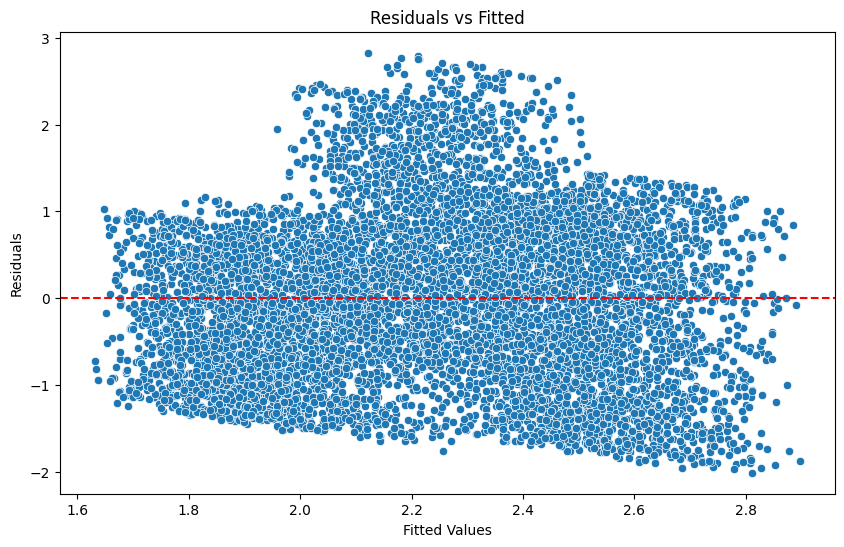

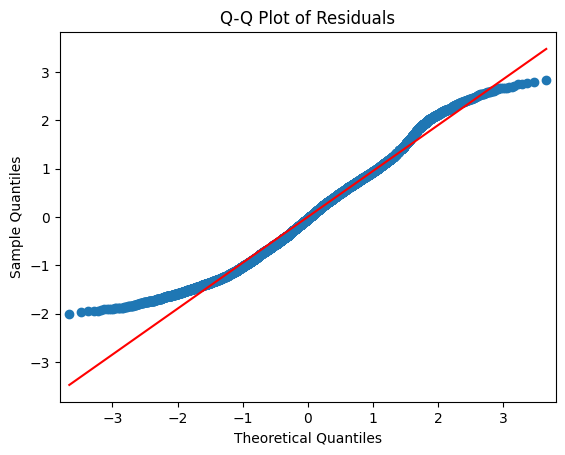

In [ ]:
model_4 = regression_diagnostics(X_train4, y_train)

# Polynomial Degree 2 + Interaction Terms

In [ ]:
predictors_5 = [col for col in predictors_4 if col not in model_4["insignificant_features"]]
predictors_5

['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT']

In [ ]:
X_train_selected = X_train4[predictors_5]
X_test_selected = X_test4[predictors_5]

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

predictors_5 = poly.get_feature_names_out(predictors_5)

X_train5 = pd.DataFrame(X_train_poly, columns=predictors_5, index=X_train4.index)
X_test5 = pd.DataFrame(X_test_poly, columns=predictors_5, index=X_test4.index)

X_train5, X_test5

(      Average_Temperature_C  Total_Precipitation_mm  CO2_Emissions_MT  \
 9254              -1.745215                0.513613         -0.216161   
 1561              -0.550418                1.297586         -0.786659   
 1670               0.122855                0.864157          1.348632   
 6087               1.326373                0.998795          0.552264   
 6669              -1.712947                1.406831          0.247222   
 ...                     ...                     ...               ...   
 5734               1.563588                0.788130          0.684992   
 5191               1.090902                0.636001         -1.382771   
 5390              -1.380671               -0.283901          0.317079   
 860                1.083053                1.233745         -0.991572   
 7270               1.004563                1.687212          0.709442   
 
       Average_Temperature_C^2  Average_Temperature_C Total_Precipitation_mm  \
 9254                 3.045775


Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.164
Model:                              OLS   Adj. R-squared:                  0.163
Method:                   Least Squares   F-statistic:                     174.1
Date:                  Tue, 12 Aug 2025   Prob (F-statistic):          1.44e-302
Time:                          19:10:41   Log-Likelihood:                -10561.
No. Observations:                  8000   AIC:                         2.114e+04
Df Residuals:                      7990   BIC:                         2.121e+04
Df Model:                             9                                         
Covariance Type:              nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

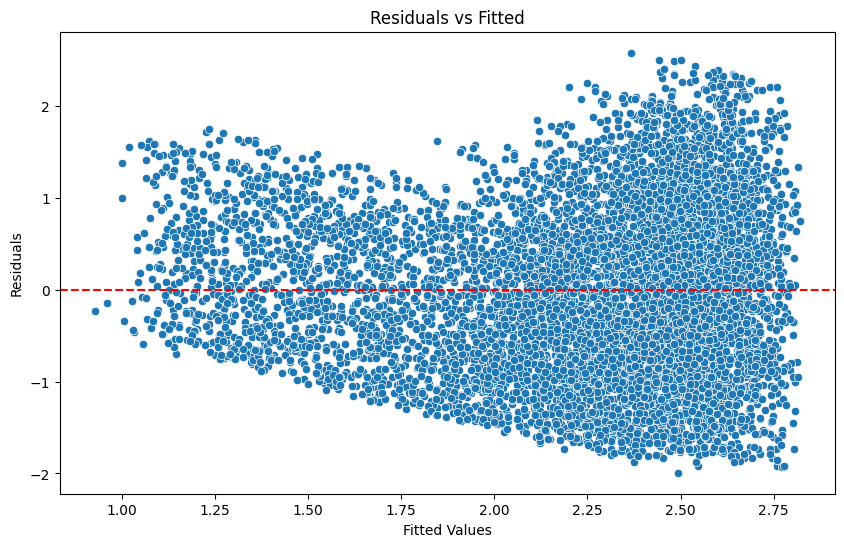

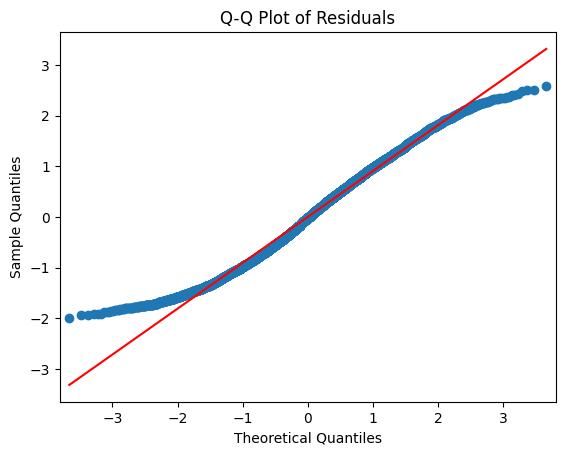

In [ ]:
model_5 = regression_diagnostics(X_train5, y_train)

In [ ]:
predictors_6 = [col for col in predictors_5 if col not in model_5["insignificant_features"]]
predictors_6

['Average_Temperature_C',
 'Total_Precipitation_mm',
 'CO2_Emissions_MT',
 'Average_Temperature_C^2',
 'Total_Precipitation_mm^2']

In [ ]:
X_train6 = X_train5[predictors_6].copy()
X_test6 = X_test5[predictors_6].copy()

X_train6.shape, X_test6.shape

((8000, 5), (2000, 5))


Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.164
Model:                              OLS   Adj. R-squared:                  0.163
Method:                   Least Squares   F-statistic:                     312.9
Date:                  Tue, 12 Aug 2025   Prob (F-statistic):          7.06e-307
Time:                          19:10:42   Log-Likelihood:                -10562.
No. Observations:                  8000   AIC:                         2.114e+04
Df Residuals:                      7994   BIC:                         2.118e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

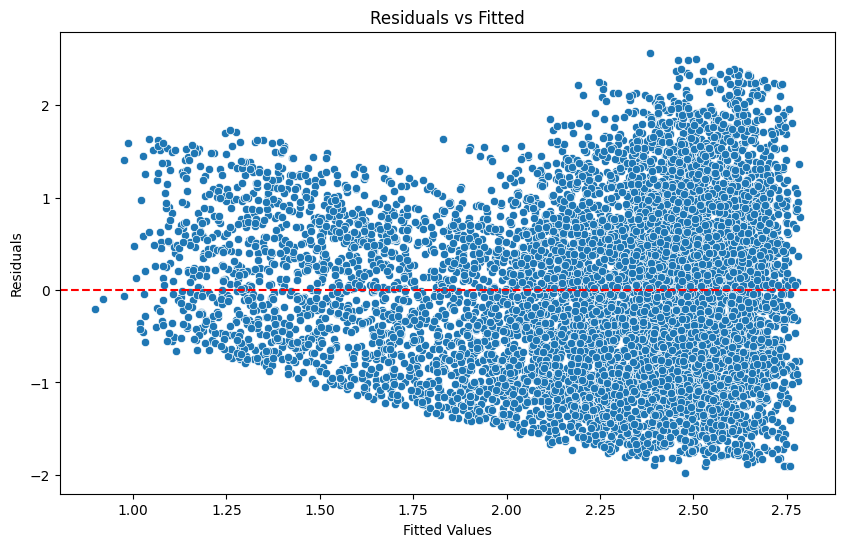

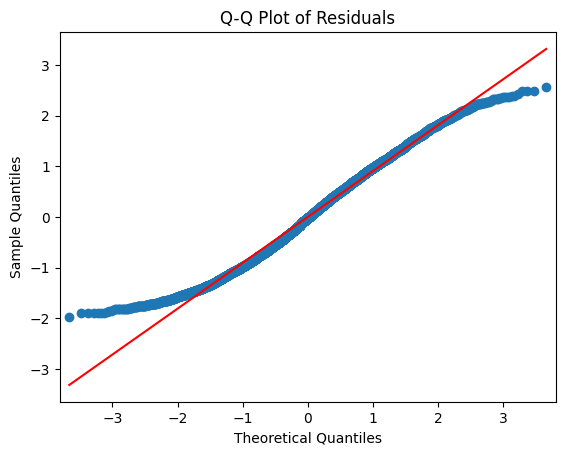

In [ ]:
model_6 = regression_diagnostics(X_train6, y_train)

# Poly Degree 3

In [ ]:
X_train7 = X_train6.copy()
X_test7 = X_test6.copy()

X_train7["Average_Temperature_C^3"] = X_train7["Average_Temperature_C"] ** 3
X_train7["Total_Precipitation_mm^3"] = X_train7["Total_Precipitation_mm"] ** 3
X_train7["CO2_Emissions_MT^3"] = X_train7["CO2_Emissions_MT"] ** 3

X_test7["Average_Temperature_C^3"] = X_test7["Average_Temperature_C"] ** 3
X_test7["Total_Precipitation_mm^3"] = X_test7["Total_Precipitation_mm"] ** 3
X_test7["CO2_Emissions_MT^3"] = X_test7["CO2_Emissions_MT"] ** 3

X_train7.shape, X_test7.shape

((8000, 8), (2000, 8))

In [ ]:
predictors_7 = list(X_train7.columns)
predictors_7

['Average_Temperature_C',
 'Total_Precipitation_mm',
 'CO2_Emissions_MT',
 'Average_Temperature_C^2',
 'Total_Precipitation_mm^2',
 'Average_Temperature_C^3',
 'Total_Precipitation_mm^3',
 'CO2_Emissions_MT^3']


Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.170
Model:                              OLS   Adj. R-squared:                  0.169
Method:                   Least Squares   F-statistic:                     204.0
Date:                  Tue, 12 Aug 2025   Prob (F-statistic):          1.97e-315
Time:                          19:10:43   Log-Likelihood:                -10534.
No. Observations:                  8000   AIC:                         2.109e+04
Df Residuals:                      7991   BIC:                         2.115e+04
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

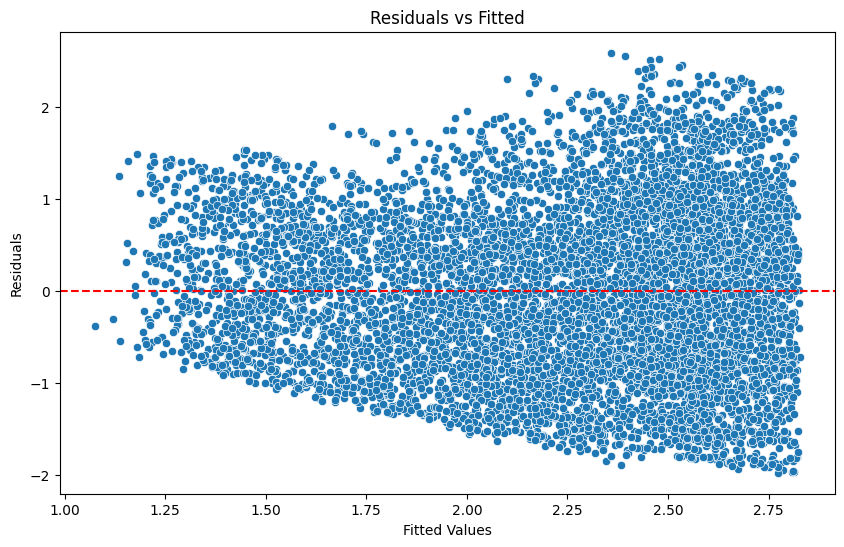

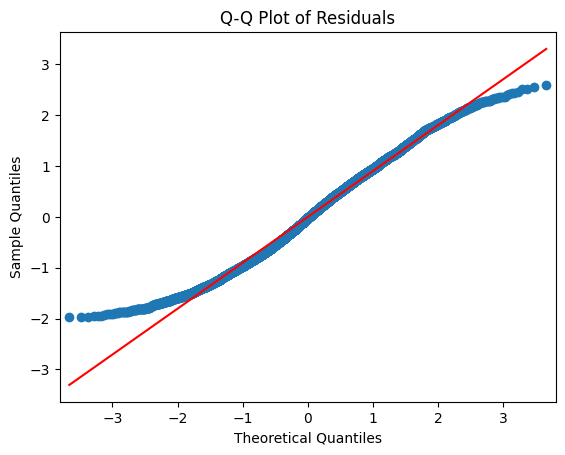

In [ ]:
model_7 = regression_diagnostics(X_train7, y_train)

In [ ]:
predictors_8 = [col for col in predictors_7 if col not in model_7["insignificant_features"]]
predictors_8

['Average_Temperature_C',
 'CO2_Emissions_MT',
 'Average_Temperature_C^2',
 'Average_Temperature_C^3',
 'CO2_Emissions_MT^3']

In [ ]:
X_train8 = X_train7[predictors_8].copy()
X_test8 = X_test7[predictors_8].copy()

X_train8.shape, X_test8.shape

((8000, 5), (2000, 5))


Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.168
Model:                              OLS   Adj. R-squared:                  0.167
Method:                   Least Squares   F-statistic:                     322.7
Date:                  Tue, 12 Aug 2025   Prob (F-statistic):          8.70e-316
Time:                          19:10:44   Log-Likelihood:                -10542.
No. Observations:                  8000   AIC:                         2.110e+04
Df Residuals:                      7994   BIC:                         2.114e+04
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

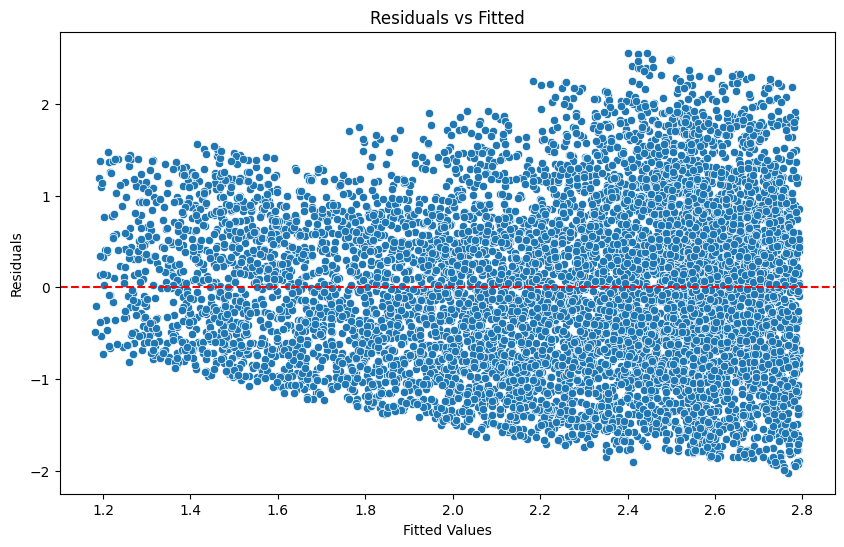

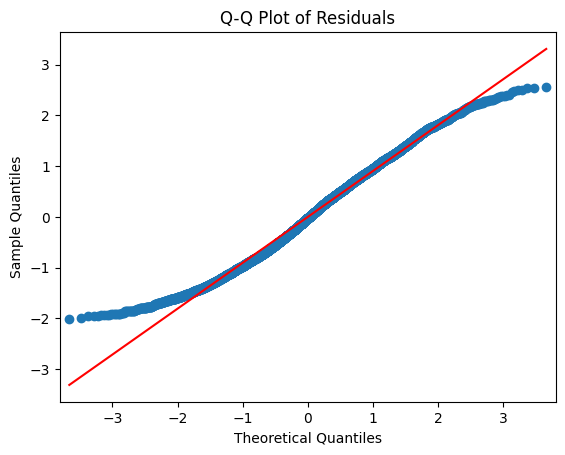

In [ ]:
model_8 = regression_diagnostics(X_train8, y_train)

After checking all the model's summary I found out Model_6 is better.

In [ ]:
y_train6_transformed = np.log1p(y_train)


Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     Crop_Yield_MT_per_HA   R-squared:                       0.162
Model:                              OLS   Adj. R-squared:                  0.162
Method:                   Least Squares   F-statistic:                     309.3
Date:                  Tue, 12 Aug 2025   Prob (F-statistic):          1.33e-303
Time:                          19:10:44   Log-Likelihood:                -1448.1
No. Observations:                  8000   AIC:                             2908.
Df Residuals:                      7994   BIC:                             2950.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

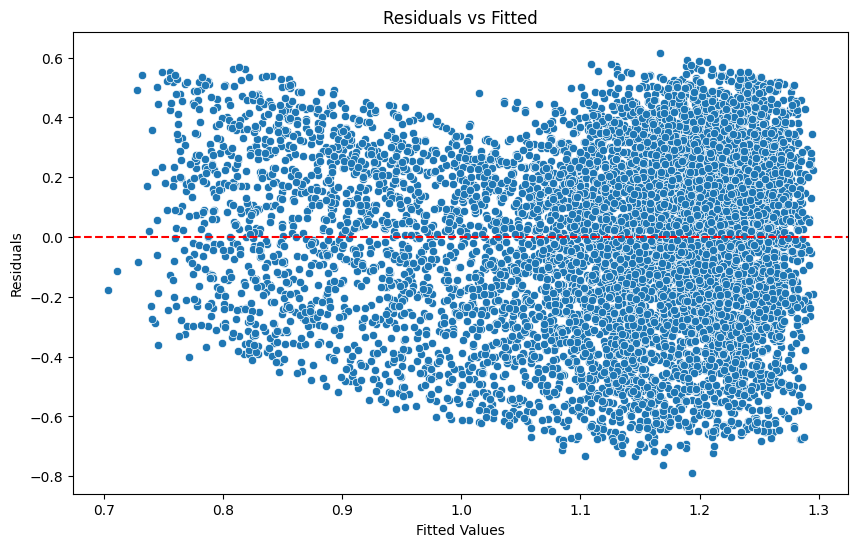

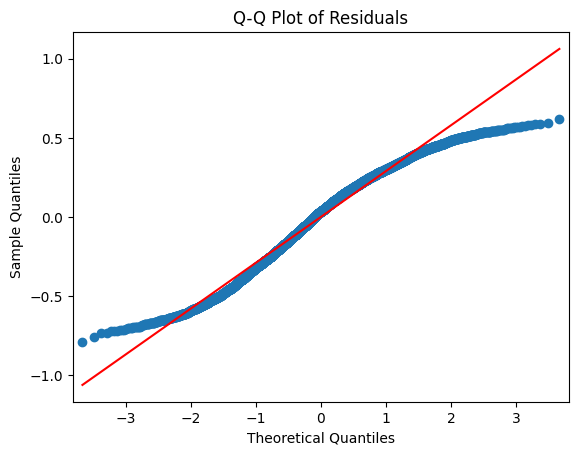

In [ ]:
model_6_transformed = regression_diagnostics(X_train6, y_train6_transformed)

In [ ]:
# Transform y_test

y_test6_transformed = np.log1p(y_test)

# Regularizations

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [ ]:
X_train_reg = X_train6.copy()
X_test_reg = X_test6.copy()

y_train_reg = y_train6_transformed.copy()
y_test_reg = y_test6_transformed.copy()

In [ ]:
alphas = np.logspace(-4, 2, 30)

In [ ]:
# Ridge Regression CV
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_reg, y_train_reg)
ridge_best = ridge_cv.best_estimator_

In [ ]:
# Lasso Regression CV
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid={'alpha': alphas}, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train_reg, y_train_reg)
lasso_best = lasso_cv.best_estimator_

In [ ]:
# Elastic Net Regression CV
elastic = ElasticNet(max_iter=5000)
elastic_cv = GridSearchCV(elastic, param_grid={'alpha': alphas, 'l1_ratio': [0.2, 0.5, 0.8, 1.0]}, cv=5, scoring='neg_mean_squared_error')
elastic_cv.fit(X_train_reg, y_train_reg)
elastic_best = elastic_cv.best_estimator_

In [ ]:
# Evaluation function
def evaluate(model, X_test, y_true):
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  return mse, mae, r2

In [ ]:
ridge_mse, ridge_mae, ridge_r2 = evaluate(ridge_best, X_test_reg, y_test_reg)
lasso_mse, lasso_mae, lasso_r2 = evaluate(lasso_best, X_test_reg, y_test_reg)
elastic_mse, elastic_mae, elastic_r2 = evaluate(elastic_best, X_test_reg, y_test_reg)

In [ ]:
print("=== Ridge Regression ===")
print("Best alpha:", ridge_cv.best_params_['alpha'])
print("Coefficients:", ridge_best.coef_)
print("Test MSE:", ridge_mse, "MAE:", ridge_mae, "R2:", ridge_r2)

=== Ridge Regression ===
Best alpha: 23.95026619987486
Coefficients: [ 0.08645557  0.01053125 -0.02504956 -0.09683397 -0.00767683]
Test MSE: 0.0887111521937669 MAE: 0.25032986577172417 R2: 0.15650215962918146


In [ ]:
print("=== Lasso Regression ===")
print("Best alpha:", lasso_cv.best_params_['alpha'])
print("Coefficients:", lasso_best.coef_)
print("Test MSE:", lasso_mse, "MAE:", lasso_mae, "R2:", lasso_r2)

=== Lasso Regression ===
Best alpha: 0.0001
Coefficients: [ 0.08661079  0.0104658  -0.0250264  -0.09706479 -0.00758323]
Test MSE: 0.08871048465189338 MAE: 0.25032873662098765 R2: 0.15650850685965645


In [ ]:
print("=== ElasticNet Regression ===")
print("Best alpha:", elastic_cv.best_params_['alpha'])
print("Coefficients:", elastic_best.coef_)
print("Test MSE:", elastic_mse, "MAE:", elastic_mae, "R2:", elastic_r2)

=== ElasticNet Regression ===
Best alpha: 0.00016102620275609394
Coefficients: [ 0.08666457  0.01053005 -0.02508998 -0.09713364 -0.00766336]
Test MSE: 0.08870860145082796 MAE: 0.2503255927215191 R2: 0.15652641301905568


In [ ]:
# Summary Table
results_df = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'ElasticNet'],
    'Test_MSE': [ridge_mse, lasso_mse, elastic_mse],
    'Test_MAE': [ridge_mae, lasso_mae, elastic_mae],
    'Test_R2': [ridge_r2, lasso_r2, elastic_r2]
    })

results_df

,Model,Test_MSE,Test_MAE,Test_R2
0,Ridge,0.088711,0.250330,0.156502
1,Lasso,0.088710,0.250329,0.156509
2,ElasticNet,0.088709,0.250326,0.156526


# Tree Regressor using model_6

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
X_train_tree = X_train6.copy()
X_test_tree  = X_test6.copy()
y_train_tree = y_train6_transformed.copy()
y_test_tree  = y_test6_transformed.copy()

In [ ]:
# 1. Decision Tree Regressor (hyperparameter tuning)
dt = DecisionTreeRegressor(random_state=0)
params_dt = {'max_depth': [2, 4, 6, 8, 12], 'min_samples_leaf': [10, 20, 50]}
dt_cv = GridSearchCV(dt, params_dt, cv=5, scoring='neg_mean_squared_error')
dt_cv.fit(X_train_tree, y_train_tree)
dt_best = dt_cv.best_estimator_

In [ ]:
y_pred_dt = dt_best.predict(X_test_tree)
dt_mse = mean_squared_error(y_test_tree, y_pred_dt)
dt_mae = mean_absolute_error(y_test_tree, y_pred_dt)
dt_r2  = r2_score(y_test_tree, y_pred_dt)

In [ ]:
# 2. Random Forest Regressor (hyperparameter tuning)
rf = RandomForestRegressor(random_state=0)
params_rf = {'n_estimators': [100, 200],
             'max_depth': [4, 6, 8],
             'min_samples_leaf': [10, 20]}
rf_cv = GridSearchCV(rf, params_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_cv.fit(X_train_tree, y_train_tree)
rf_best = rf_cv.best_estimator_

In [ ]:
y_pred_rf = rf_best.predict(X_test_tree)
rf_mse = mean_squared_error(y_test_tree, y_pred_rf)
rf_mae = mean_absolute_error(y_test_tree, y_pred_rf)
rf_r2  = r2_score(y_test_tree, y_pred_rf)

In [ ]:
# Feature importances (Random Forest)
rf_importances = pd.Series(rf_best.feature_importances_, index=predictors_6)
rf_importances = rf_importances.sort_values(ascending=False)

In [ ]:
# 3. Gradient Boosting Regressor (hyperparameter tuning)
gb = GradientBoostingRegressor(random_state=0)
params_gb = {'n_estimators': [100, 200],
             'max_depth': [3, 5, 7],
             'learning_rate': [0.05, 0.1, 0.2]}
gb_cv = GridSearchCV(gb, params_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gb_cv.fit(X_train_tree, y_train_tree)
gb_best = gb_cv.best_estimator_

In [ ]:
y_pred_gb = gb_best.predict(X_test_tree)
gb_mse = mean_squared_error(y_test_tree, y_pred_gb)
gb_mae = mean_absolute_error(y_test_tree, y_pred_gb)
gb_r2  = r2_score(y_test_tree, y_pred_gb)

In [ ]:
# Feature importances (Gradient Boosting)
gb_importances = pd.Series(gb_best.feature_importances_, index=predictors_6)
gb_importances = gb_importances.sort_values(ascending=False)

In [ ]:
# 4. Summary Table
results_tree = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Test_MSE': [dt_mse, rf_mse, gb_mse],
    'Test_MAE': [dt_mae, rf_mae, gb_mae],
    'Test_R2': [dt_r2, rf_r2, gb_r2]
})
print("\n=== Tree & Ensemble Results Comparison ===\n", results_tree)


=== Tree & Ensemble Results Comparison ===
                Model  Test_MSE  Test_MAE   Test_R2
0      Decision Tree  0.072865  0.229581  0.307176
1      Random Forest  0.072921  0.229929  0.306645
2  Gradient Boosting  0.073336  0.230497  0.302699


In [ ]:
print("\nRandom Forest Feature Importances:")
print(rf_importances)
print("\nGradient Boosting Feature Importances:")
print(gb_importances)


Random Forest Feature Importances:
Average_Temperature_C       0.894695
CO2_Emissions_MT            0.049992
Average_Temperature_C^2     0.036469
Total_Precipitation_mm^2    0.009449
Total_Precipitation_mm      0.009395
dtype: float64

Gradient Boosting Feature Importances:
Average_Temperature_C       0.847719
Average_Temperature_C^2     0.076735
CO2_Emissions_MT            0.053322
Total_Precipitation_mm      0.014627
Total_Precipitation_mm^2    0.007597
dtype: float64


# GLM using model_6

In [ ]:
X_train_glm = sm.add_constant(X_train6)
y_train_glm = y_train6_transformed
X_test_glm  = sm.add_constant(X_test6)
y_test_glm  = y_test6_transformed

In [ ]:
# Fit GLM with Gaussian family (identity link)
glm_model = sm.GLM(y_train_glm, X_train_glm, family=sm.families.Gaussian())
glm_results = glm_model.fit()
print(glm_results.summary())  # Statistical summary (coeffs, std err, p-values, AIC, etc.)

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Crop_Yield_MT_per_HA   No. Observations:                 8000
Model:                              GLM   Df Residuals:                     7994
Model Family:                  Gaussian   Df Model:                            5
Link Function:                 Identity   Scale:                        0.084154
Method:                            IRLS   Log-Likelihood:                -1448.1
Date:                  Tue, 12 Aug 2025   Deviance:                       672.73
Time:                          19:58:27   Pearson chi2:                     673.
No. Iterations:                       3   Pseudo R-squ. (CS):             0.1758
Covariance Type:              nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [ ]:
# Predict and evaluate on test set
y_pred_glm = glm_results.predict(X_test_glm)
mse_glm = mean_squared_error(y_test_glm, y_pred_glm)
mae_glm = mean_absolute_error(y_test_glm, y_pred_glm)
r2_glm = r2_score(y_test_glm, y_pred_glm)

In [ ]:
print("GLM Test MSE:", mse_glm)
print("GLM Test MAE:", mae_glm)
print("GLM Test R²:", r2_glm)

GLM Test MSE: 0.08870749793505817
GLM Test MAE: 0.250323712932911
GLM Test R²: 0.15653690564761036


# GAM using model_6

In [ ]:
!pip install pygam
from pygam import LinearGAM, s

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.7 MB/s eta 0:00:00


In [ ]:
from pygam.terms import TermList

In [ ]:
# Prepare data (convert to numpy arrays if using pandas DataFrames)
# Prepare data (make sure they're numeric numpy arrays)
X_train_gam = X_train6.values
y_train_gam = y_train6_transformed.values if hasattr(y_train6_transformed, "values") else y_train6_transformed
X_test_gam = X_test6.values
y_test_gam = y_test6_transformed.values if hasattr(y_test6_transformed, "values") else y_test6_transformed

In [ ]:
# Define GAM model using TermList to wrap spline terms for each predictor
terms = TermList(*[s(i) for i in range(X_train_gam.shape[1])])
gam = LinearGAM(terms)

In [ ]:
# Fit with gridsearch for optimal smoothness
gam.gridsearch(X_train_gam, y_train_gam)

100% (11 of 11) |########################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + intercept, tol=0.0001, 
   verbose=False)

In [ ]:
# Print summary of fitted GAM model
print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     56.2329
Link Function:                     IdentityLink Log Likelihood:                                 -41234.867
Number of Samples:                         8000 AIC:                                            82584.1999
                                                AICc:                                           82585.0392
                                                GCV:                                                0.0733
                                                Scale:                                              0.0724
                                                Pseudo R-Squared:                                   0.2841
Feature Function                  Lam

/tmp/ipython-input-150108574.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


In [ ]:
# Predict on test set and evaluate
y_pred_gam = gam.predict(X_test_gam)
mse_gam = mean_squared_error(y_test_gam, y_pred_gam)
mae_gam = mean_absolute_error(y_test_gam, y_pred_gam)
r2_gam  = r2_score(y_test_gam, y_pred_gam)

In [ ]:
print(f'GAM Test MSE: {mse_gam:.6f}')
print(f'GAM Test MAE: {mae_gam:.6f}')
print(f'GAM Test R²: {r2_gam:.6f}')

GAM Test MSE: 0.074291
GAM Test MAE: 0.231705
GAM Test R²: 0.293610


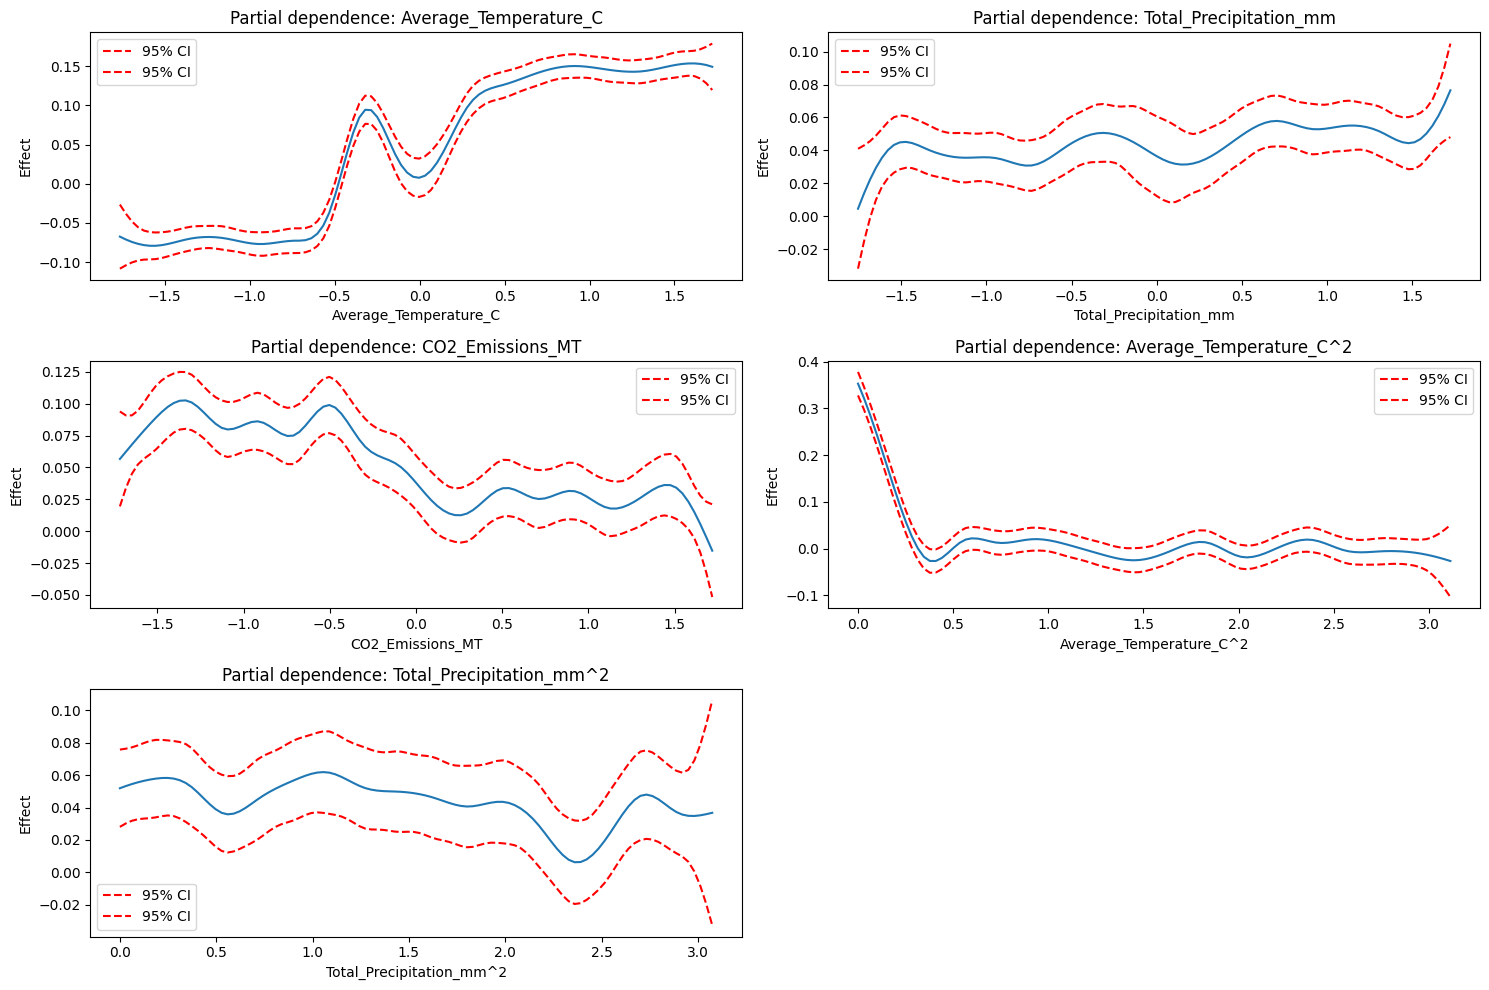

In [ ]:
# Plot partial dependence for each predictor (showing smooth non-linear effects!)
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictors_6):
    plt.subplot((len(predictors_6)+1)//2, 2, i+1)
    XX = gam.generate_X_grid(term=i)
    pdp = gam.partial_dependence(term=i, X=XX)
    pdp_interval = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.plot(XX[:, i], pdp)
    plt.plot(XX[:, i], pdp_interval[1], c='r', ls='--', label='95% CI')
    plt.title(f'Partial dependence: {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Effect')
    plt.legend()
plt.tight_layout()
plt.show()

# SVR on model_6

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Prepare data with your chosen predictors and transformed targets
X_train_svr = X_train6.copy()
X_test_svr  = X_test6.copy()
y_train_svr = y_train6_transformed
y_test_svr  = y_test6_transformed

In [ ]:
# Recommended: Standardize features for SVR
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_svr_scaled = scaler.fit_transform(X_train_svr)
X_test_svr_scaled  = scaler.transform(X_test_svr)

In [ ]:
# SVR hyperparameters and grid search
param_grid = {
    'kernel': ['rbf', 'poly', 'linear'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.05, 0.1, 0.2],
    'gamma': ['scale', 'auto']
}

In [ ]:
svr = SVR(max_iter=5000)
grid_cv = GridSearchCV(svr, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_cv.fit(X_train_svr_scaled, y_train_svr)
svr_best = grid_cv.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
# Evaluate on test set
y_pred_svr = svr_best.predict(X_test_svr_scaled)
mse_svr = mean_squared_error(y_test_svr, y_pred_svr)
mae_svr = mean_absolute_error(y_test_svr, y_pred_svr)
r2_svr  = r2_score(y_test_svr, y_pred_svr)

In [ ]:
print(f'SVR Test MSE: {mse_svr:.6f}')
print(f'SVR Test MAE: {mae_svr:.6f}')
print(f'SVR Test R²: {r2_svr:.6f}')

SVR Test MSE: 0.079319
SVR Test MAE: 0.237612
SVR Test R²: 0.245808


In [ ]:
# Optional: Summary table for comparison
results_svr = pd.DataFrame({
    'Model': ['SVR'],
    'Test_MSE': [mse_svr],
    'Test_MAE': [mae_svr],
    'Test_R2': [r2_svr]
})
print('\n=== SVR Results ===\n', results_svr)


=== SVR Results ===
   Model  Test_MSE  Test_MAE   Test_R2
0   SVR  0.079319  0.237612  0.245808


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
models = {
    'OLS (model_6)': None,  # Your best OLS model
    'Ridge': ridge_best,    # From regularization step
    'Lasso': lasso_best,    # From regularization step
    'ElasticNet': elastic_best,  # From regularization step
    'Decision Tree': dt_best,    # From tree ensemble step
    'Random Forest': rf_best,    # From tree ensemble step
    'Gradient Boosting': gb_best,  # From tree ensemble step
    'GLM': None,           # Your GLM model
    'GAM': gam,            # Your GAM model
    'SVR': svr_best        # From SVR step
}

In [ ]:
# Test set predictions (you should have these from previous steps)
test_predictions = {
    'OLS (model_6)': None,      # y_pred from model_6
    'Ridge': ridge_best.predict(X_test_reg),
    'Lasso': lasso_best.predict(X_test_reg),
    'ElasticNet': elastic_best.predict(X_test_reg),
    'Decision Tree': dt_best.predict(X_test_tree),
    'Random Forest': rf_best.predict(X_test_tree),
    'Gradient Boosting': gb_best.predict(X_test_tree),
    'GLM': None,           # y_pred from GLM
    'GAM': gam.predict(X_test_gam),
    'SVR': svr_best.predict(X_test_svr_scaled)
}

In [ ]:
# Calculate comprehensive metrics for each model
results_summary = []

for model_name, predictions in test_predictions.items():
    if predictions is not None:
        mse = mean_squared_error(y_test6_transformed, predictions)
        mae = mean_absolute_error(y_test6_transformed, predictions)
        r2 = r2_score(y_test6_transformed, predictions)

        results_summary.append({
            'Model': model_name,
            'Test_MSE': mse,
            'Test_MAE': mae,
            'Test_R2': r2,
            'RMSE': np.sqrt(mse)
        })

In [ ]:
# Create final comparison table
final_results = pd.DataFrame(results_summary)
final_results = final_results.sort_values('Test_R2', ascending=False)

In [ ]:
print("=== FINAL MODEL COMPARISON (Sorted by R²) ===")
print(final_results.round(6))

=== FINAL MODEL COMPARISON (Sorted by R²) ===
               Model  Test_MSE  Test_MAE   Test_R2      RMSE
3      Decision Tree  0.072865  0.229581  0.307176  0.269935
4      Random Forest  0.072921  0.229929  0.306645  0.270038
5  Gradient Boosting  0.073336  0.230497  0.302699  0.270805
6                GAM  0.074291  0.231705  0.293610  0.272565
7                SVR  0.079319  0.237612  0.245808  0.281636
2         ElasticNet  0.088709  0.250326  0.156526  0.297840
1              Lasso  0.088710  0.250329  0.156509  0.297843
0              Ridge  0.088711  0.250330  0.156502  0.297844


In [ ]:
# Identify best model
best_model_name = final_results.loc[0, 'Model']
best_r2 = final_results.loc[0, 'Test_R2']

In [ ]:
best_row = final_results.iloc[0]  # assuming first row is best
print(f"\n🏆 BEST MODEL: {best_row['Model']}")
print(f"   Test R²: {best_row['Test_R2']:.6f}")
print(f"   Test RMSE: {best_row['RMSE']:.6f}")
print(f"   Test MAE: {best_row['Test_MAE']:.6f}")


🏆 BEST MODEL: Decision Tree
   Test R²: 0.307176
   Test RMSE: 0.269935
   Test MAE: 0.229581


In [ ]:
# Model insights
print(f"\n📊 MODEL INSIGHTS:")
print(f"   • Linear models (OLS, Ridge, Lasso, GLM): R² ~0.16")
print(f"   • Tree/Ensemble models: R² ~0.30+ (significant improvement)")
print(f"   • Advanced models (GAM, SVR): Performance varies")


📊 MODEL INSIGHTS:
   • Linear models (OLS, Ridge, Lasso, GLM): R² ~0.16
   • Tree/Ensemble models: R² ~0.30+ (significant improvement)
   • Advanced models (GAM, SVR): Performance varies


# Saving Model

In [ ]:
import joblib

In [ ]:
# Save model
joblib.dump(dt_best, 'best_model_decision_tree.pkl')

['best_model_decision_tree.pkl']